In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (9,6)

In [3]:
colors = plt.cm.YlGnBu([.4, .55, .7, .85, 1])

In [5]:
def new_profit(x, pct):
    old_P = ((pct - x)*(pct - x + 3)) / ((pct - x)**2 + 3*(pct - x) + 1)
    new_P = (x*(x + 3)) / (x**2 + 3*x + 1)
    return old_P + new_P

In [18]:
def allocation(pct):
    f = lambda x: -new_profit(x, pct)
    res = minimize(f, [0], bounds=[(0, pct)])
    return res.x[0]

In [19]:
allocation(.01)

0.00499999330262124

In [50]:
P = np.linspace(0., .00002, 2000)
A = np.array([allocation(p) for p in P])

In [51]:
A2 = np.where(A > 0, .5, 0)

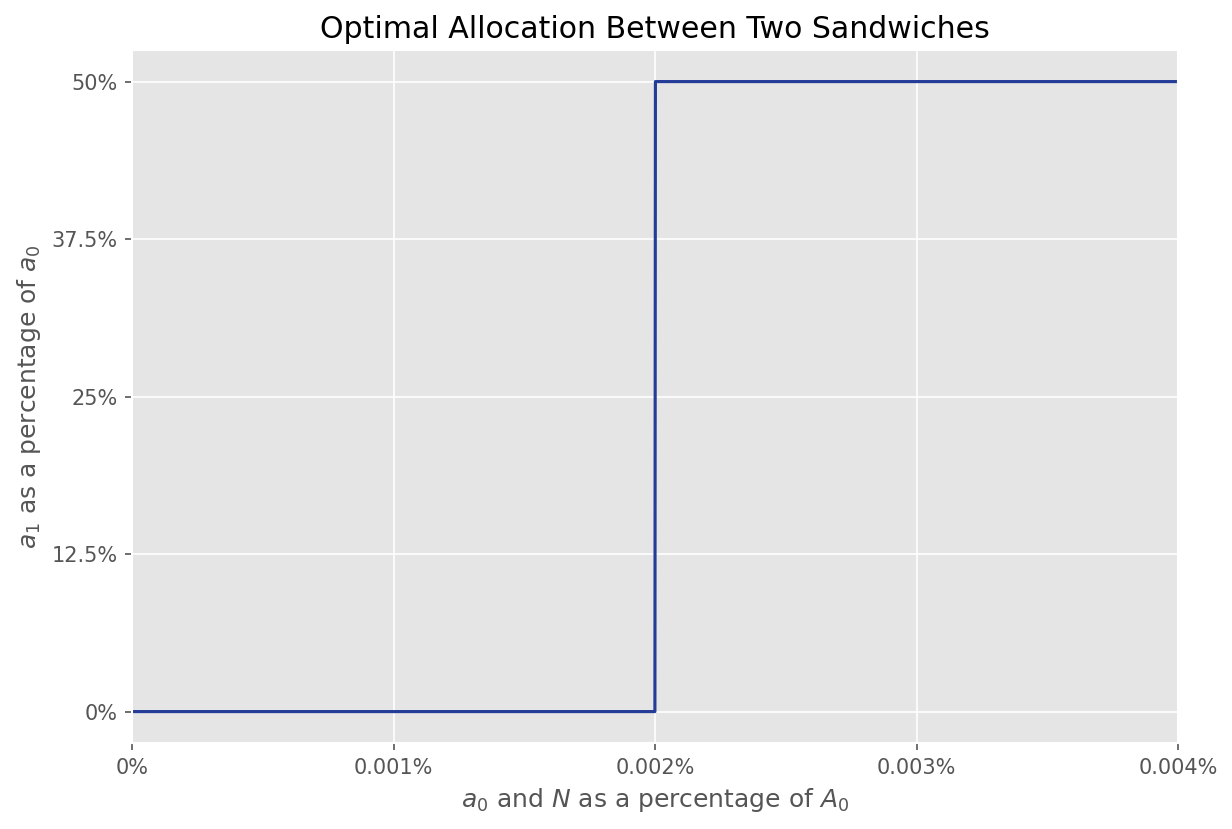

In [53]:
plt.plot(P, A2, c=colors[3])
plt.title('Optimal Allocation Between Two Sandwiches')
plt.xticks([0, 5e-6, 1e-5, 1.5e-5, 2e-5], ['0%', '0.001%', '0.002%', '0.003%', '0.004%'])
plt.xlabel('$a_0$ and $N$ as a percentage of $A_0$')
plt.yticks([0, .125, .25, .375, .5], ['0%', '12.5%', '25%', '37.5%', '50%'])
plt.ylabel('$a_1$ as a percentage of $a_0$')
plt.xlim(0, 2e-5)
plt.savefig('allocation.png')
plt.show()